<a href="https://colab.research.google.com/github/Patience3/06472025_Churning_Customers/blob/main/Sombang_Churn_Assignmnet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data loading and display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intro To AI/Project/CustomerChurn_dataset.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Data Preprocessing using one hot encoding for binary categorie

Droping the customer id by domain knowledge

In [ ]:
df.drop(['customerID'], axis=1, inplace=True)


In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:"No", 1:"Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_removed_cust=df.copy()

In [ ]:


non_numeric_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn','SeniorCitizen']

# One-hot encode non-numeric features
df_encoded = pd.get_dummies(df[non_numeric_columns])


# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # coerce to handle conversion errors

# Concatenate the one-hot encoded DataFrame and the original DataFrame using the original index
df = pd.concat([df, df_encoded], axis=1)

# Drop the original non-numeric columns
df.drop(non_numeric_columns, axis=1, inplace=True)

# Display the result
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,SeniorCitizen_No,SeniorCitizen_Yes
0,1,29.85,29.85,1,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0
2,2,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   gender_Female                            7043 non-null   uint8  
 4   gender_Male                              7043 non-null   uint8  
 5   Partner_No                               7043 non-null   uint8  
 6   Partner_Yes                              7043 non-null   uint8  
 7   Dependents_No                            7043 non-null   uint8  
 8   Dependents_Yes                           7043 non-null   uint8  
 9   PhoneService_No                          7043 non-null   uint8  
 10  PhoneService_Yes                         7043 no

##Feature selection

###Performing Feature importance on data

<ipython-input-10-3fb9cb5ce84b>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


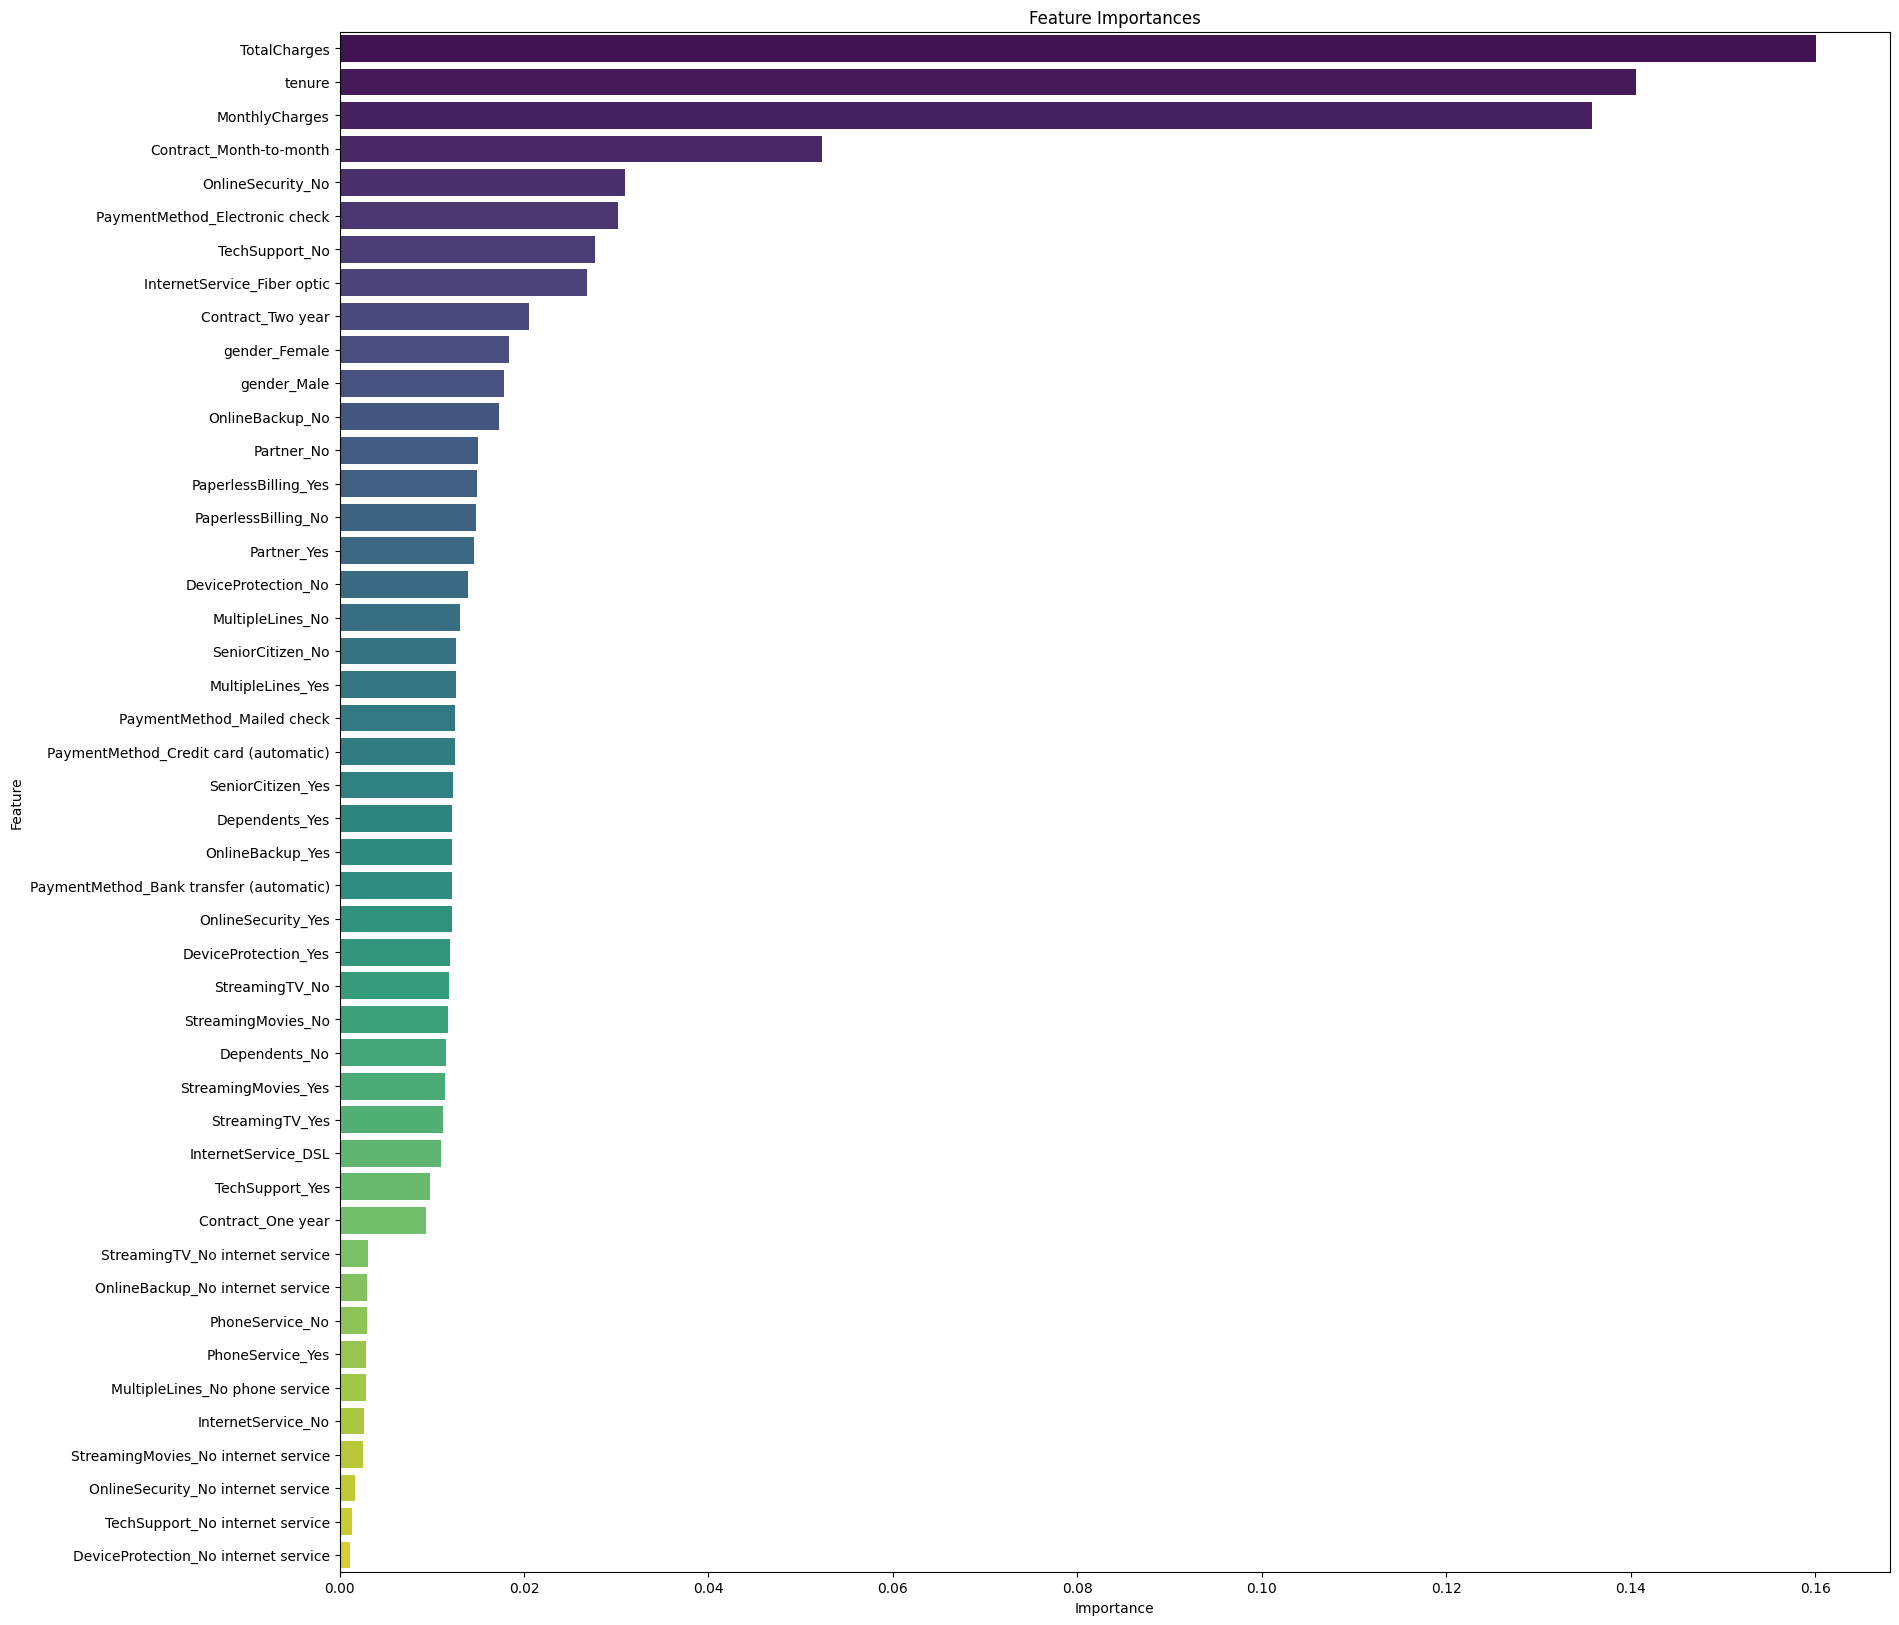

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# 'df' is your DataFrame with the one-hot encoded features
# 'Churn' is the target variable

# Handle missing values by imputing with mean for the entire DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Extract X and y
X = df_imputed.drop(columns=['Churn_Yes', 'Churn_No'], axis=1)
y = df_imputed[['Churn_Yes']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()


In [ ]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,SeniorCitizen_No,SeniorCitizen_Yes
0,1,29.85,29.85,1,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0
2,2,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,1,0
7039,72,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
7040,11,29.60,346.45,1,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,1,0
7041,4,74.40,306.60,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,1


From the above feature importance, I will select some feature, and I will perform a corelation to select some features that the biases of the random forest based feature importance may have missed.

In [ ]:
list_of_features_from_feature_importance=[
"tenure", "MonthlyCharges", "TotalCharges", "gender_Female", "gender_Male", "Partner_Yes","Dependents_Yes",
"PhoneService_No", "MultipleLines_No", "InternetService_DSL", "InternetService_Fiber optic",
"InternetService_No", "OnlineSecurity_No", "OnlineBackup_No", "DeviceProtection_No", "TechSupport_No",
 "Contract_Month-to-month", "Contract_Two year", "PaperlessBilling_No", "PaperlessBilling_Yes", "PaymentMethod_Electronic check"]

###Performing correlation for validation and continual selection

In [ ]:
df_corr= df.corr()
df_corr['Churn_Yes'].sort_values(ascending=False)

Churn_Yes                                  1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen_Yes                          0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

From the above corelation, values like gender are

In [ ]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,SeniorCitizen_No,SeniorCitizen_Yes
0,1,29.85,29.85,1,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0
2,2,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,1,0
7039,72,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
7040,11,29.60,346.45,1,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,1,0
7041,4,74.40,306.60,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,1


In [ ]:
temp = df_corr[abs(df_corr['Churn_Yes']) > 0.15]['Churn_Yes']
df_correlation = df[temp.index]
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7043 non-null   int64  
 1   MonthlyCharges                        7043 non-null   float64
 2   TotalCharges                          7032 non-null   float64
 3   Partner_No                            7043 non-null   uint8  
 4   Partner_Yes                           7043 non-null   uint8  
 5   Dependents_No                         7043 non-null   uint8  
 6   Dependents_Yes                        7043 non-null   uint8  
 7   InternetService_Fiber optic           7043 non-null   uint8  
 8   InternetService_No                    7043 non-null   uint8  
 9   OnlineSecurity_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service    7043 non-null   uint8  
 11  OnlineSecurity_Ye

Though dependents is not included in the feture importance, it seems significant to include the dependents as there is a probability of people with more dependents to keep them busy eith the internet.

In [ ]:
df_corr= df_correlation.corr()
df_corr['Churn_Yes'].sort_values(ascending=False)

Churn_Yes                               1.000000
Contract_Month-to-month                 0.405103
OnlineSecurity_No                       0.342637
TechSupport_No                          0.337281
InternetService_Fiber optic             0.308020
PaymentMethod_Electronic check          0.301919
OnlineBackup_No                         0.268005
DeviceProtection_No                     0.252481
MonthlyCharges                          0.193356
PaperlessBilling_Yes                    0.191825
Dependents_No                           0.164221
SeniorCitizen_Yes                       0.150889
Partner_No                              0.150448
Partner_Yes                            -0.150448
SeniorCitizen_No                       -0.150889
Dependents_Yes                         -0.164221
TechSupport_Yes                        -0.164674
OnlineSecurity_Yes                     -0.171226
Contract_One year                      -0.177820
PaperlessBilling_No                    -0.191825
TotalCharges        

From the above correlation output, some values like gender are direct opposite corelation with their counterpart gender female. Thus if only one is considered (gender_male) and the response is no, it automatically implies gender female. Thus I will remove their counterparts. Thus I will consider one, to capture bothe poles. Also, with features that are dependent on internet service like streaming, if the internet service is no, they automatically become irrelevant to my dataset.

In [ ]:
list_of_features_from_corelation = ["Churn_Yes", "Contract_Month-to-month", "OnlineSecurity_No", "TechSupport_No", "InternetService_Fiber optic", "PaymentMethod_Electronic check", "OnlineBackup_No", "DeviceProtection_No", "MonthlyCharges", "PaperlessBilling_Yes", "SeniorCitizen_Yes", "Partner_No", "Dependents_Yes", "TechSupport_Yes", "OnlineSecurity_Yes", "Contract_One year", "PaperlessBilling_No", "TotalCharges", "InternetService_No", "Contract_Two year", "tenure"]


I will write code, that would create a list of the element that are both in the feature importance list, and the correlation selection list to get a faire understandijng of my distribution. After that, I will display the remaining features for reconsideration.

###Final features phase

In [ ]:

# Find the intersection of the two lists
common_features = set(list_of_features_from_corelation) & set(list_of_features_from_feature_importance)

# Display the common features
print("Common Features:\n\n", common_features)

# Find features that are not present in the intersection
not_found_in_intersection = set(list_of_features_from_corelation) ^ set(list_of_features_from_feature_importance)

# Display features not found in the intersection
print("\n\nFeatures not found in the intersection:\n", not_found_in_intersection)


Common Features:

 {'Contract_Month-to-month', 'OnlineSecurity_No', 'Contract_Two year', 'Dependents_Yes', 'PaymentMethod_Electronic check', 'TotalCharges', 'tenure', 'InternetService_No', 'DeviceProtection_No', 'TechSupport_No', 'PaperlessBilling_Yes', 'PaperlessBilling_No', 'MonthlyCharges', 'OnlineBackup_No', 'InternetService_Fiber optic'}


Features not found in the intersection:
 {'MultipleLines_No', 'OnlineSecurity_Yes', 'gender_Female', 'gender_Male', 'SeniorCitizen_Yes', 'TechSupport_Yes', 'Contract_One year', 'Partner_No', 'Partner_Yes', 'PhoneService_No', 'Churn_Yes', 'InternetService_DSL'}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   gender_Female                            7043 non-null   uint8  
 4   gender_Male                              7043 non-null   uint8  
 5   Partner_No                               7043 non-null   uint8  
 6   Partner_Yes                              7043 non-null   uint8  
 7   Dependents_No                            7043 non-null   uint8  
 8   Dependents_Yes                           7043 non-null   uint8  
 9   PhoneService_No                          7043 non-null   uint8  
 10  PhoneService_Yes                         7043 no

Current ste of DF

In [ ]:

# Create a DataFrame with common features
df_current = df[['tenure', 'TotalCharges', 'OnlineSecurity_No', 'Contract_Two year', 'InternetService_No',
                   'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'PaperlessBilling_Yes',
                   'TechSupport_No', 'PaperlessBilling_No', 'MonthlyCharges', 'Dependents_Yes',
                   'Contract_Month-to-month', 'DeviceProtection_No', 'OnlineBackup_No']]

# Add additional features to the DataFrame
additional_features = ['SeniorCitizen_Yes', 'gender_Male', 'TechSupport_Yes', 'InternetService_DSL',
                       'Partner_Yes', 'OnlineSecurity_Yes', 'PhoneService_No', 'Partner_No',
                       'Contract_One year', 'Churn_Yes']

df = pd.concat([df_current, df[additional_features]], axis=1)

# Display the new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7043 non-null   int64  
 1   TotalCharges                    7032 non-null   float64
 2   OnlineSecurity_No               7043 non-null   uint8  
 3   Contract_Two year               7043 non-null   uint8  
 4   InternetService_No              7043 non-null   uint8  
 5   PaymentMethod_Electronic check  7043 non-null   uint8  
 6   InternetService_Fiber optic     7043 non-null   uint8  
 7   PaperlessBilling_Yes            7043 non-null   uint8  
 8   TechSupport_No                  7043 non-null   uint8  
 9   PaperlessBilling_No             7043 non-null   uint8  
 10  MonthlyCharges                  7043 non-null   float64
 11  Dependents_Yes                  7043 non-null   uint8  
 12  Contract_Month-to-month         70

##EDA ANALYSIS

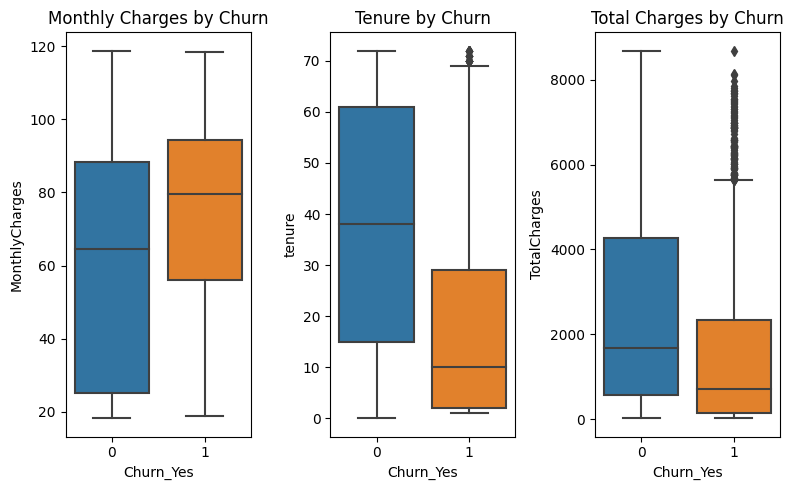

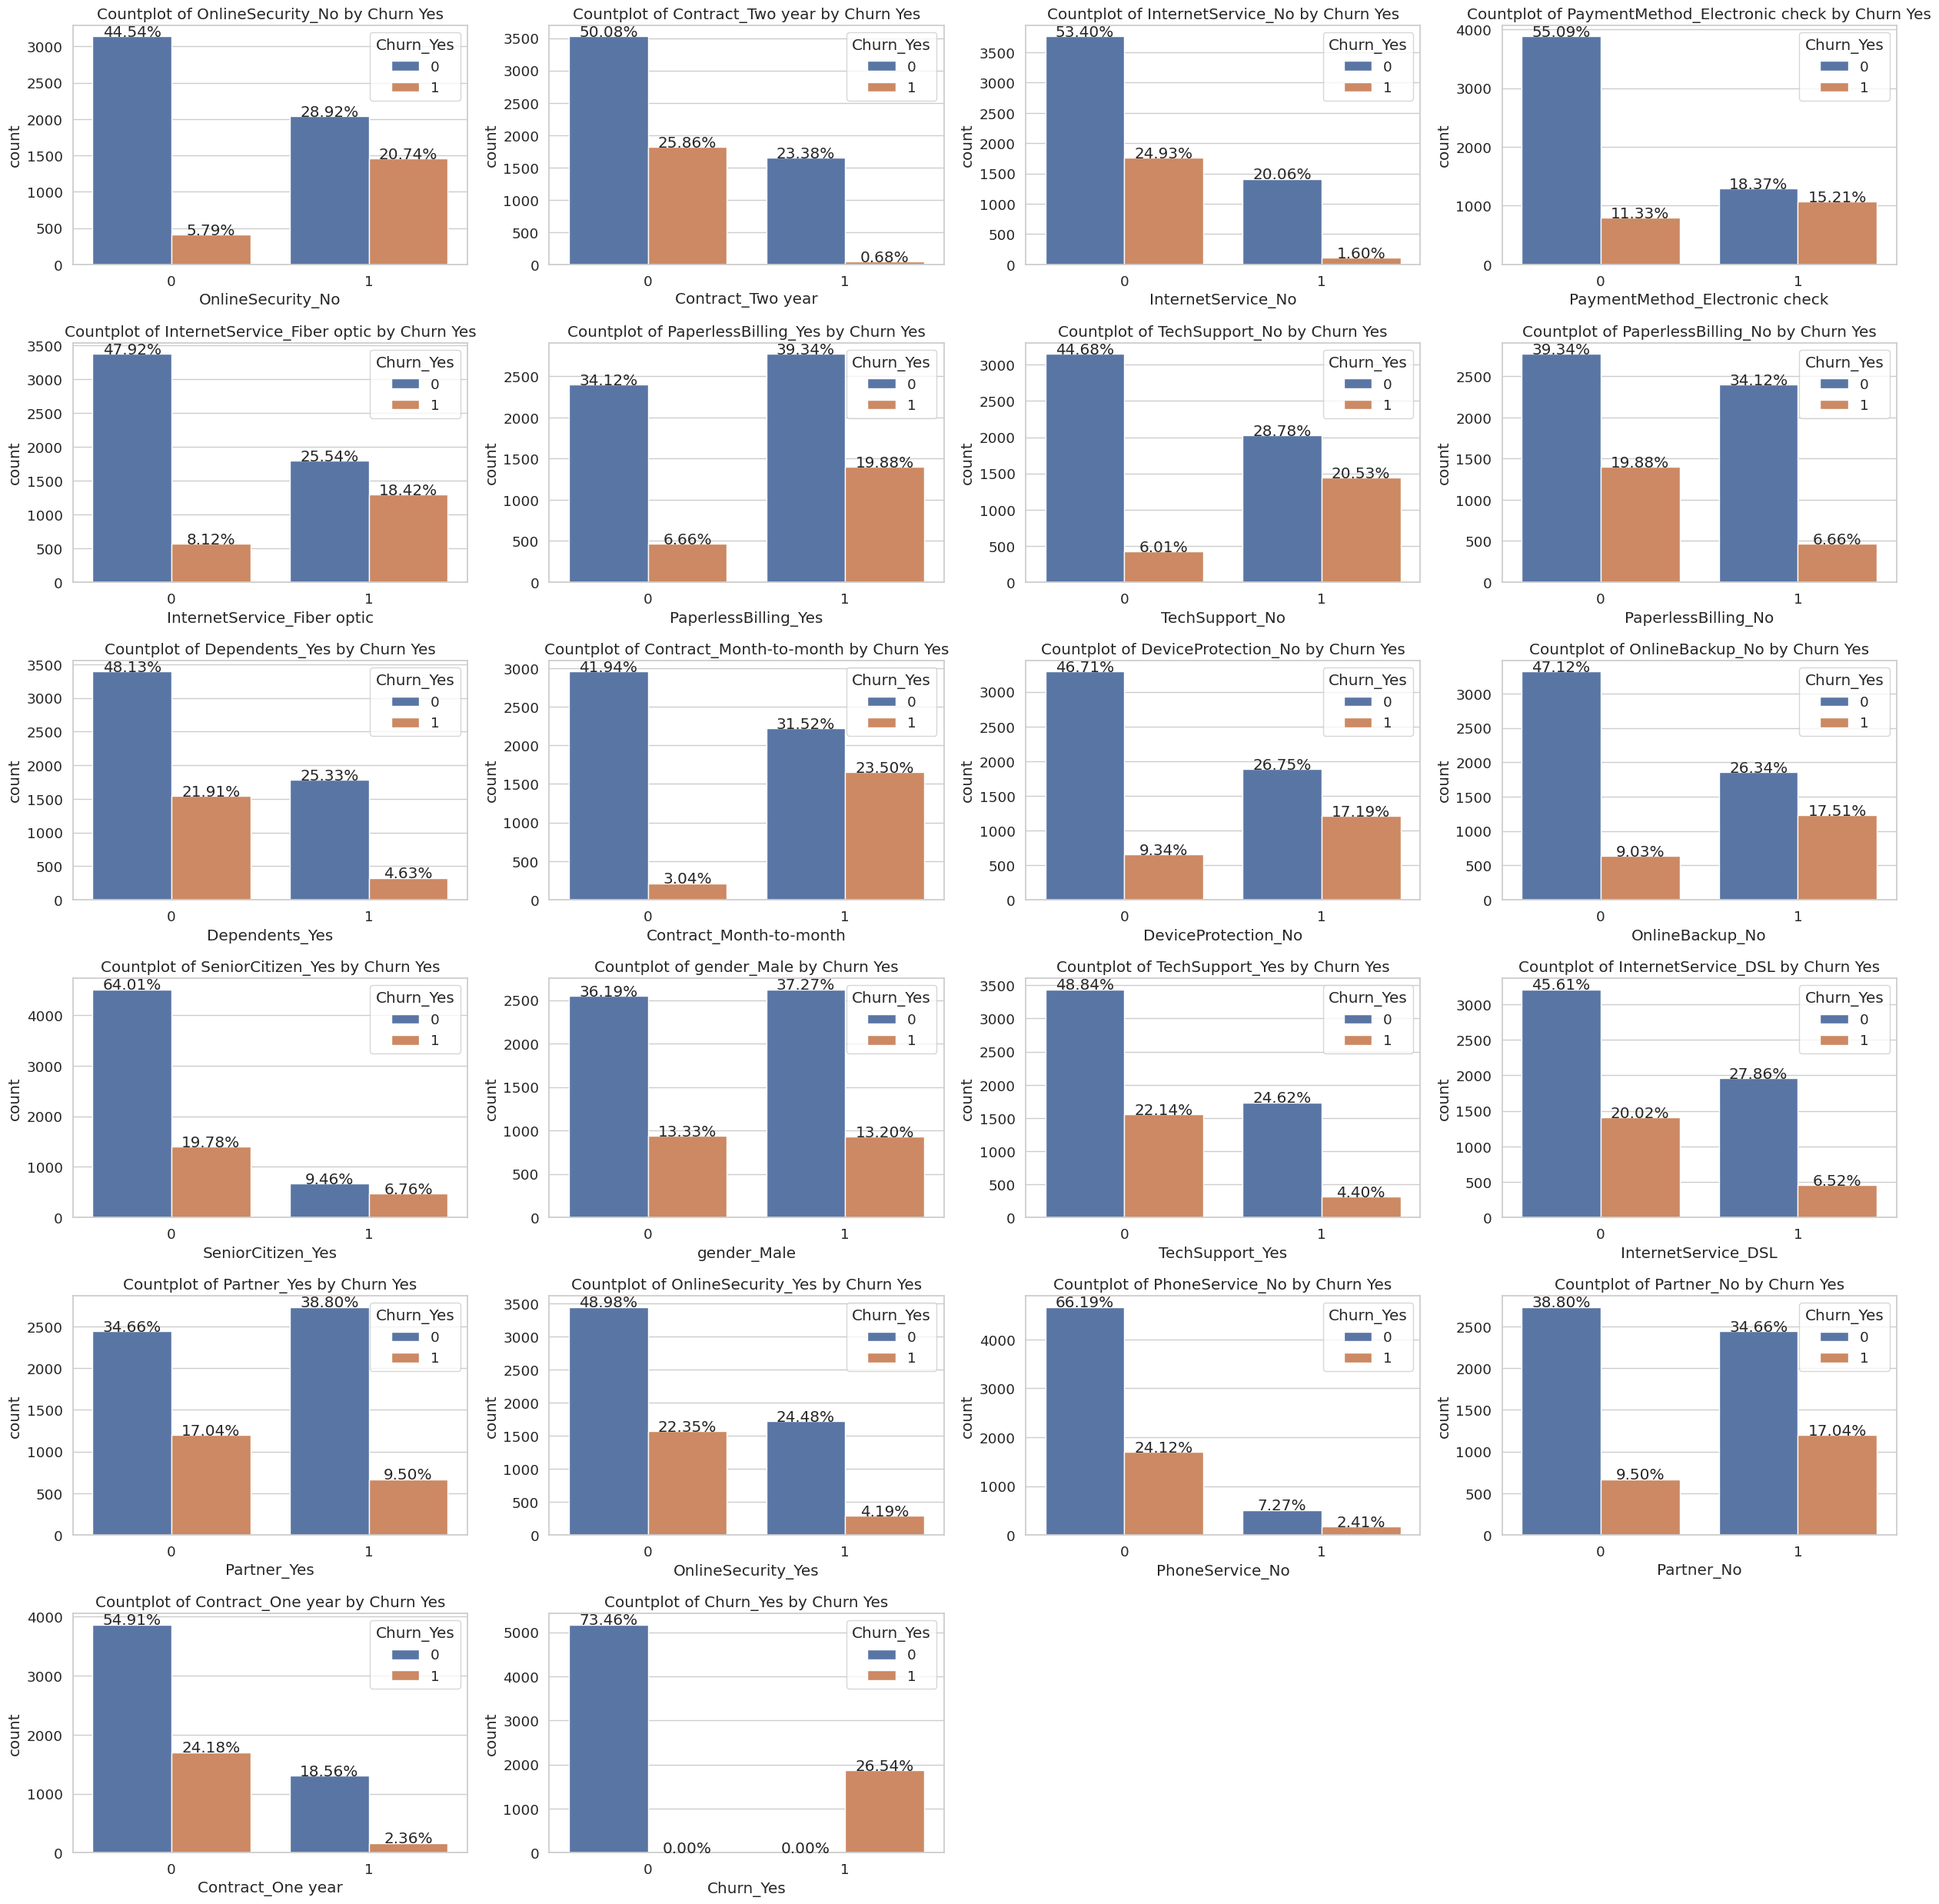

In [ ]:

# Replace 'Churn_Yes' with the actual one-hot encoded column for 'Churn' being 'Yes'
churned_customers = df[df['Churn_Yes'] == 1]

# Box plots for selected numerical features
plt.figure(figsize=(8, 5))

# Monthly Charges, Tenure, Total Charges
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn_Yes', y='tenure', data=df)
plt.title('Tenure by Churn')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn_Yes', y='TotalCharges', data=df)
plt.title('Total Charges by Churn')

plt.tight_layout()
plt.show()

# Pair plot for all other features against Churn_Yes
sns.set(style="whitegrid", font_scale=1.2)
pair_plot_df = df.drop(['MonthlyCharges', 'tenure', 'TotalCharges'], axis=1)  # Exclude numerical features from pair plot

plt.figure(figsize=(25, 25))

# Calculate the number of rows and columns dynamically
num_features = pair_plot_df.shape[1]
num_cols = 4
num_rows = -(-num_features // num_cols)  # Ceiling division to calculate the number of rows

# Loop through the remaining features
for i, feature in enumerate(pair_plot_df.columns):
    ax = plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(x=feature, hue='Churn_Yes', data=df)
    plt.title(f'Countplot of {feature} by Churn Yes')

    # Annotate with percentages
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{(height / total * 100):.2f}%', ha="center")

plt.tight_layout()
plt.show()


From the above gaphic representations, I can conclude that  a person  

1.   No two year contract
2.   with phone service
3.   With no partners
4. with no online security
5. With internet service that is not DSL
6. with no tech support
7. with a month to month contract
8. with no dependents
9. with no device protection
10. with no online back up
11. with fibre optic internet service
12. With internet service
15. With electronic check payment method
16. with paperless billing

 Are those who churn more




##Selecting features for the progression
From the above grpahic analysis, Gender seems to have no relationship with churn. Thus I will renarrow my features thus.

In [ ]:
df_progression = df[['tenure', 'OnlineSecurity_No', 'InternetService_No', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'PaperlessBilling_Yes', 'TechSupport_No', 'MonthlyCharges', 'Dependents_Yes', 'Contract_Month-to-month', 'DeviceProtection_No', 'OnlineBackup_No', 'SeniorCitizen_Yes', 'TechSupport_Yes', 'InternetService_DSL', 'Partner_Yes', 'OnlineSecurity_Yes', 'PhoneService_No', 'Contract_One year', 'Churn_Yes']]

y = df_progression['Churn_Yes']
X = df_progression.drop(['Churn_Yes'], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training (80%), validation (10%), and testing (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7043 non-null   int64  
 1   OnlineSecurity_No               7043 non-null   uint8  
 2   InternetService_No              7043 non-null   uint8  
 3   PaymentMethod_Electronic check  7043 non-null   uint8  
 4   InternetService_Fiber optic     7043 non-null   uint8  
 5   PaperlessBilling_Yes            7043 non-null   uint8  
 6   TechSupport_No                  7043 non-null   uint8  
 7   MonthlyCharges                  7043 non-null   float64
 8   Dependents_Yes                  7043 non-null   uint8  
 9   Contract_Month-to-month         7043 non-null   uint8  
 10  DeviceProtection_No             7043 non-null   uint8  
 11  OnlineBackup_No                 7043 non-null   uint8  
 12  SeniorCitizen_Yes               70


###Feature validation

##Training and Accuracy

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


# from keras.optimizers import Adam


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 5.1449 - accuracy: 0.2922 - val_loss: 0.7073 - val_accuracy: 0.5511
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5482 - accuracy: 0.7545 - val_loss: 0.5128 - val_accuracy: 0.7614
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4983 - accuracy: 0.7652 - val_loss: 0.4978 - val_accuracy: 0.7628
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7677 - val_loss: 0.4920 - val_accuracy: 0.7670
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4831 - accuracy: 0.7717 - val_loss: 0.4868 - val_accuracy: 0.7727
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4797 - accuracy: 0.7774 - val_loss: 0.4823 - val_accuracy: 0.7827
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0.7771 - val_loss: 0.4781 - val_accuracy: 0.7784

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.8032


80.31594157218933

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.8034
Test Loss: 0.3944
Test Accuracy: 80.3407


##Hyper parameter tunning

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:

from tensorflow.keras.layers import Input, Dense, Dropout

def build_model(hp):
    inputs = Input(shape=(X_train.shape[1],))
    x = inputs

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        x = Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=96, step=32),
                  activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh']))(x)
        x = Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1))(x)

    outputs = Dense(1, activation='sigmoid')(x)

    # Tune the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


###test the model

In [ ]:
build_model(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=100,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

In [ ]:
tuner.search(X_train, y_train, epochs=30 ,validation_data=(X_test, y_test))


Trial 253 Complete [00h 01m 24s]
val_accuracy: 0.8190205693244934

Best val_accuracy So Far: 0.8246983885765076
Total elapsed time: 00h 46m 44s

Search: Running Trial #254

Value             |Best Value So Far |Hyperparameter
2                 |2                 |num_hidden_layers
96                |64                |units_0
relu              |tanh              |activation_0
0.3               |0.2               |dropout_0
0.00098884        |0.0017014         |lr
32                |96                |units_1
tanh              |relu              |activation_1
0.3               |0                 |dropout_1
32                |64                |units_2
relu              |tanh              |activation_2
0.1               |0.1               |dropout_2
64                |96                |units_3
relu              |tanh              |activation_3
0.2               |0.4               |dropout_3
100               |34                |tuner/epochs
0                 |12                |tuner/in

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.results_summary()

In [ ]:
best_model = tuner.get_best_models(num_models=2)[0]
best_model.summary()

In [ ]:
test_accuracy = best_model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
print("Best Hyperparameters:\n","""

        Trial 0243 summary
        Hyperparameters:
        num_hidden_layers: 1
        units_0: 32
        activation_0: tanh
        lr: 0.00175004788390259
        units_1: 32
        activation_1: tanh
        units_2: 32
        activation_2: tanh
        units_3: 96
        activation_3: tanh
        tuner/epochs: 34
        tuner/initial_epoch: 0
        tuner/bracket: 1
        tuner/round: 0
        Score: 0.8311688303947449
      """)

##Deployment of Model

In [ ]:
import streamlit as st
import tensorflow as ts
import keras as k

In [ ]:
# Save the scalers to a file
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Saving the model

In [ ]:

# Save the TensorFlow model
best_model.save("best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Find the rest in my Python deployment file




  <Papa Yaw Boampong Wireko> (<16/Nov/2023>) <Final Presentation/Intro to AI> (<ANN>) [<>]